# Team 6 Project 1 : Analysis of Regionwise Sales Data for Video Games 

Team: Mark Levine, Richa Singh, John Yun, Miguel Gomez

Data source 
"Kaggle.com" https://www.kaggle.com/gregorut/videogamesales

Notebook Contents
1. Data pull
2. Data Cleaning 
3. Data Exploration /Initial Analysis

In [31]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
style.use('ggplot')

In [8]:
# Read CSV File 
# Cite Data Source""
file = "vgsales.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")

In [9]:
#read the data frame
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
# Data Overview for any cleanup requirements
df.count()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

# Data Cleaning Findings
1. The counts for Year and Publisher column does not match up. Need for clean up. 
1. Year column has 271 entries with N/A
2. Publisher column has 58 entries with N/A

In [11]:
# Cleaned data set by dropping N/A 
df = df.dropna(how='any')
df.count()

Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

In [12]:
# Data types 
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [13]:
# statistical overview
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [14]:
# General Obervations
# sales for the regions 

average_sales_NA = df["NA_Sales"].mean()
average_sales_EU = df["EU_Sales"].mean()
average_sales_JP = df["JP_Sales"].mean()
average_sales_Oth = df["Other_Sales"].mean()
average_sales_Global = df["Global_Sales"].mean()

 
total_sales_NA = df["NA_Sales"].sum()
total_sales_EU = df["EU_Sales"].sum()
total_sales_JP = df["JP_Sales"].sum()
total_sales_Oth = df["Other_Sales"].sum()
total_sales_Global = df["Global_Sales"].sum()


number_sales=df["Global_Sales"].count()
item_count = len(df["Name"].unique())

# DataFrame to hold results
summary_table = pd.DataFrame({"Number of Unique Items": [item_count],
                              "Total Sales NA": [total_sales_NA],
                              "Total Sales EU": [total_sales_EU],
                              "Total Sales JP": [total_sales_JP],
                              "Total Sales Oth": [total_sales_Oth],
                              "Total Sales Global": [total_sales_Global],
                              "Average Sales NA": [average_sales_NA],
                              "Average Sales EU": [average_sales_EU],
                              "Average Sales JP": [average_sales_JP],
                              "Average Sales Oth": [average_sales_Oth],
                              "Average Sales Global": [average_sales_Global],
                              "Total Sales Number": [number_sales]})

 
summary_table = summary_table.round(2)

# Display the summary_table
summary_table


,Number of Unique Items,Total Sales NA,Total Sales EU,Total Sales JP,Total Sales Oth,Total Sales Global,Average Sales NA,Average Sales EU,Average Sales JP,Average Sales Oth,Average Sales Global,Total Sales Number
0,11325,4327.65,2406.69,1284.27,788.91,8811.97,0.27,0.15,0.08,0.05,0.54,16291


In [15]:
#sales share by region 
NA_per = total_sales_NA/total_sales_Global*100
EU_per = total_sales_EU/total_sales_Global*100  
JP_per = total_sales_JP/total_sales_Global*100  
oth_per = total_sales_Oth /total_sales_Global*100

Sales_dist_table = pd.DataFrame({"Percentage Sales NA": [NA_per],
                                 "Percentage Sales EU": [EU_per],
                                 "Percentage Sales JP": [JP_per],
                                 "Percentage Sales Oth": [oth_per]
                              })

 
Sales_dist_table = Sales_dist_table.round(2)

# Display the summary_table
Sales_dist_table



,Percentage Sales NA,Percentage Sales EU,Percentage Sales JP,Percentage Sales Oth
0,49.11,27.31,14.57,8.95


# Observations 
North America has the highest regional share of the total video games sales, followed by European Union , Japan and then rest of the world

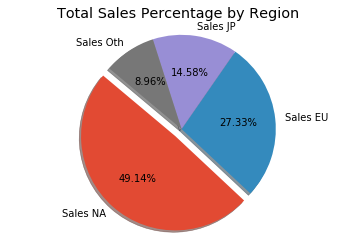

In [26]:
labels = ["Sales NA", "Sales EU", "Sales JP", "Sales Oth"]

# The values of each section of the pie chart
sizes = [49.11, 27.31, 14.57, 8.95]

explode = (0.1, 0, 0, 0)
plt.title("Total Sales Percentage by Region")
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("total_sales_pie.png")

In [16]:
#count by genres
count_genres = df["Genre"].value_counts()
count_genres 

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

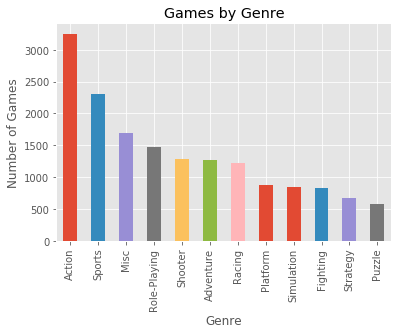

In [25]:
ct_genres = count_genres.plot(kind='bar')

ct_genres.set_title("Games by Genre")
ct_genres.set_xlabel("Genre")
ct_genres.set_ylabel("Number of Games")

plt.show()
fig2 = ct_genres.get_figure()
fig2.tight_layout()
fig2.savefig("Games_by_Genre.png")

# Observation
1. Action tops the sales by genre, followed by Sports, Misc and role playing. 
2. Puzzle and strategy are at the lower sales levels 

In [17]:
#count of uniques publishers
count_publisher = df["Publisher"].value_counts()
count_publisher

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

# Observations
There are 576 publishers. 
The top 5 are 
1. Electronic Arts                           
2. Activision                                 
3. Namco Bandai Games                         
4. Ubisoft                                    
5. Konami Digital Entertainment 

In [18]:
#count of uniques platforms
count_platforms = df["Platform"].value_counts()
count_platforms 

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

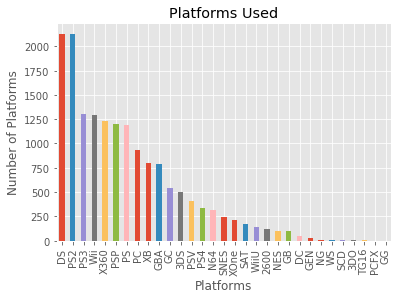

In [19]:
ct_platforms = count_platforms.plot(kind='bar')


ct_platforms.set_title("Platforms Used")
ct_platforms.set_xlabel("Platforms")
ct_platforms.set_ylabel("Number of Platforms")

plt.show()

fig1 = ct_platforms.get_figure()
fig1.tight_layout()
fig1.savefig("platforms1.png")

# Obervations
There are 31 publishers 
Top 7 publishers 
1. DS      
2. PS2     
3. PS3     
4. Wii    
5. X360   
6. PSP    
7. PS     

In [20]:
# Sales Trends by regions
by_year = df.groupby("Year")

sales_by_year = by_year["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].sum()
sales_by_year = pd.DataFrame(sales_by_year)
sales_by_year = sales_by_year.sort_values('Global_Sales',ascending = False) 
 

sales_by_year


,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,
2008.0,678.90,351.44,184.40,60.26,82.39
2009.0,667.30,338.85,191.59,61.89,74.77
2007.0,609.92,311.18,160.18,60.29,77.58
2010.0,600.29,304.24,176.57,59.49,59.90
2006.0,521.04,263.12,129.24,73.73,54.43
2011.0,515.80,241.00,167.31,53.04,54.39
2005.0,458.51,241.58,121.56,54.28,40.55
2004.0,414.01,218.80,105.92,41.65,47.24
2002.0,395.52,216.19,109.74,41.76,27.28


C:\Users\markl\Anaconda3\envs\PythonDev\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


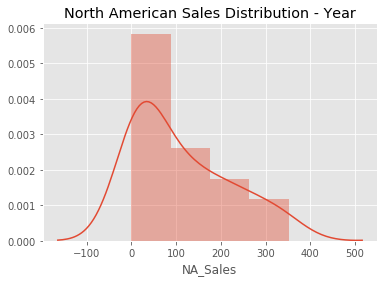

In [29]:
fig3 = sns.distplot(sales_by_year["NA_Sales"])

fig3.set_title("North American Sales Distribution - Year")

fig4 = fig3.get_figure()
fig4.savefig("NAsales.png")

In [21]:
# Sales by publisher for regions
by_pub = df.groupby("Publisher")

sales_by_pub = by_pub["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"].sum()

sales_by_pub = pd.DataFrame(sales_by_pub)
sales_by_pub = sales_by_pub.sort_values('Global_Sales',ascending = False)

sales_by_pub



,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,,
Nintendo,1784.43,815.75,418.30,454.99,95.19
Electronic Arts,1093.39,584.22,367.38,13.98,127.63
Activision,721.41,426.01,213.72,6.54,74.79
Sony Computer Entertainment,607.28,265.22,187.55,74.10,80.40
Ubisoft,473.54,252.81,163.03,7.33,50.16
Take-Two Interactive,399.30,220.47,117.95,5.83,55.20
THQ,340.44,208.60,94.60,5.01,32.11
Konami Digital Entertainment,278.56,88.91,68.62,90.93,29.91
Sega,270.70,108.78,81.41,56.19,24.30


In [22]:
# Sales by Genre for regions
by_genre = df.groupby("Genre")

sales_by_genre = by_genre["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ].sum()

sales_by_genre = pd.DataFrame(sales_by_genre)

sales_by_genre = sales_by_genre.sort_values('Global_Sales',ascending = False)

sales_by_genre

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,1722.84,861.77,516.48,158.65,184.92
Sports,1309.24,670.09,371.34,134.76,132.65
Shooter,1026.20,575.16,310.45,38.18,101.90
Role-Playing,923.83,326.50,187.57,350.29,59.38
Platform,829.13,445.99,200.65,130.65,51.51
Misc,789.87,396.92,211.77,106.67,73.92
Racing,726.76,356.93,236.31,56.61,76.68
Fighting,444.05,220.74,100.00,87.15,36.19
Simulation,389.98,181.78,113.02,63.54,31.36


In [23]:
# Sales by Platform for regions
by_platform = df.groupby("Platform")

sales_by_platform = by_platform["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ].sum()

sales_by_platform = pd.DataFrame(sales_by_platform)

sales_by_platform = sales_by_platform.sort_values('Global_Sales',ascending = False)

sales_by_platform

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,,
PS2,1233.46,572.92,332.63,137.54,190.47
X360,969.60,594.33,278.00,12.30,84.67
PS3,949.35,388.90,340.47,79.21,140.81
Wii,909.81,497.37,264.35,68.28,79.20
DS,818.91,388.53,194.05,175.02,60.29
PS,727.39,334.71,212.38,139.78,40.69
GBA,305.62,178.43,72.49,46.56,7.51
PSP,291.71,107.09,67.16,75.89,41.52
PS4,278.10,96.80,123.70,14.30,43.36


In [24]:
# Sales by Name for regions
by_name = df.groupby("Name")

sales_by_name = by_name["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales" ].sum()

sales_by_name = pd.DataFrame(sales_by_name)

sales_by_name= sales_by_name.sort_values('Global_Sales',ascending = False)

sales_by_name

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,
Wii Sports,82.74,41.49,29.02,3.77,8.46
Grand Theft Auto V,55.92,23.46,23.04,1.39,8.03
Super Mario Bros.,45.31,32.48,4.88,6.96,0.99
Tetris,35.84,26.17,2.95,6.03,0.69
Mario Kart Wii,35.82,15.85,12.88,3.79,3.31
Wii Sports Resort,33.00,15.75,11.01,3.28,2.96
Pokemon Red/Pokemon Blue,31.37,11.27,8.89,10.22,1.00
Call of Duty: Modern Warfare 3,30.83,15.58,11.29,0.62,3.35
New Super Mario Bros.,30.01,11.38,9.23,6.50,2.90


# Analysis
The following analyses include Chi Square and Linear Regression. 
With Chi Square, we are attempting to prove that region's tastes and preferences are indeed
different as it relates to Name, Genre, Publisher and Platform.


In [45]:
#Let's first create a new variable "Other Countries" which is Global Sales minus US Sales;
#we will use OtherCountries variable to compare to US sales
sales_by_genre['OtherCountries'] = sales_by_genre['Global_Sales'] - sales_by_genre['NA_Sales']
sales_by_name['OtherCountries'] = sales_by_name['Global_Sales'] - sales_by_name['NA_Sales']
sales_by_platform['OtherCountries'] = sales_by_platform['Global_Sales'] - sales_by_platform['NA_Sales']
sales_by_year['OtherCountries'] = sales_by_year['Global_Sales'] - sales_by_year['NA_Sales']
sales_by_pub['OtherCountries'] = sales_by_pub['Global_Sales'] - sales_by_pub['NA_Sales']

print(sales_by_genre.shape[0])
print(sales_by_name.shape[0])
print(sales_by_platform.shape[0])
print(sales_by_year.shape[0])
print(sales_by_pub.shape[0])
#Taking Top 25 from each category except for genre; this will prevent very small values or 0s in the Chi Square analysis;
#we could filter out zeros but i like Top 25 since it is consistent across the categories

Top_25_Name = sales_by_name.nlargest(25,'Global_Sales')
Top_25_Platform = sales_by_platform.nlargest(25,'Global_Sales')
Top_25_Year = sales_by_year.nlargest(25,'Global_Sales')
Top_25_Pub = sales_by_pub.nlargest(25, 'Global_Sales')


12
11325
31
39
576


In [40]:
#Create our critical values for genre and all other categories (recall we used Top 25 so the degrees of freedom and hence
#critical values will be the same for all other categories)
Rows_Genre = sales_by_genre.shape[0]
critical_value_genre = round(stats.chi2.ppf(q = 0.95, df = Rows_Genre -1 ),0)
critical_value_all_others = round(stats.chi2.ppf(q = 0.95, df = 24),0)
print(f'Genre CritValue = {critical_value_genre}; \
Top 25 CritValue = {critical_value_all_others},')

Genre CritValue = 20.0; Top 25 CritValue = 36.0,


Running chi squared test on each of the four sub data sets to see if there is a difference between NA Sales and All Other
Countries by Genre, Name, Platform and Year
*Per the documentation, Chi squared works when frequencies are at least 5 (5 rows) to be valid

In [52]:
Genre_CS = stats.chisquare(sales_by_genre['OtherCountries'], sales_by_genre['NA_Sales'])
Genre_CS

Power_divergenceResult(statistic=296.24427475987216, pvalue=5.415160952101298e-57)

In [48]:
Name_CS = stats.chisquare(Top_25_Name['OtherCountries'], Top_25_Name['NA_Sales'])
Name_CS

Power_divergenceResult(statistic=80.53219652703714, pvalue=5.0039770750226196e-08)

In [50]:
Platform_CS = stats.chisquare(Top_25_Platform['OtherCountries'],Top_25_Platform['NA_Sales'])

Platform_CS
#The 0.0 p-value warrants a closer look as it seems dubious along with the 2,312 stat value

Power_divergenceResult(statistic=2312.864231274496, pvalue=0.0)

In [51]:
Pub_CS = stats.chisquare(Top_25_Pub['OtherCountries'], Top_25_Pub['NA_Sales'])
Pub_CS

Power_divergenceResult(statistic=798.9213906925772, pvalue=3.4960579749224954e-153)

### Analysis of Chi Squared: 
Genre: Since our CS Statistic value is 296 vs 20 critical value compounded by an extremely low p-value, we can reject the NULL hypothesis; conclusion is that by  genre,sales across major regions are different. 

Name: Since our CS Statistic value is 80 vs 36 critical value compounded by an extremely low p-value, we can reject the NULL hypothesis; conclusion is that by  genre,sales across major regions are different. 

Platform: Since our CS Statistic value is 2,312 vs 36 critical value compounded by an extremely low p-value, we can reject the NULL hypothesis; conclusion is that by  genre,sales across major regions are different. 

Publisher : Since our CS Statistic value is 799 vs 36 critical value compounded by an extremely low p-value, we can reject the NULL hypothesis; conclusion is that by  genre,sales across major regions are different. 


### Linear Regression
Transitioning to linear regression models. Linear regression seeks to quantify the relationship between variables: for every 1 unit change (in this case millions USD) in one country's sales, how does that impact our target variable sales? 

Typically, pre processing for linear models includes testing for multicollineartiy
(i.e. can two variables perfectly explain a third variable) and also removing highly correlated variables. Neither of these
are true within this dataset. Normalization is also a good practice when columns are on different scales, but our columns
are all on the same scale (million of dollars in sales). 

In the following code, we are using the North American sales as the dependent variable. EU, Japan and Other's could be used as well. Our logic is that if multinational Gaming corporation releases their game in other regions first and seeks to estimate North American sales impact, they could use linear regression to estimate North American sales. 

In [53]:
#Run linear regression on the "Name" subset using North American sales as our Dependent variable and EU, Japan and Other Countries 
#as our independent variables. The new "OtherCountries" variable is not in this analysis
sales_model_name_all = ols("NA_Sales ~ EU_Sales + JP_Sales + Other_Sales", data = sales_by_name).fit()
sales_model_name_all_summary = sales_model_name_all.summary()
#results = sales_model_name_all.fit()
sales_model_name_all_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     6996.
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:03:34   Log-Likelihood:                -11944.
No. Observations:               11325   AIC:                         2.390e+04
Df Residuals:                   11321   BIC:                         2.392e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0857      0.007     12.384      0.000       0.072       0.099
EU_Sales        0.8325      0.016     53.370      0.000       0.802       0.863
JP_Sales        0.4570      0.018     25.192      0.000       0.421       0.493
Other_Sales     0.9720      0.042     23.280      0.000       0.890       1.054
==============================================================================
Omnibus:                    19028.639   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         72950676.415
Skew:                          10.786   Prob(JB):                         0.00
Kurtosis:                     395.597   Cond. No.                         7.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

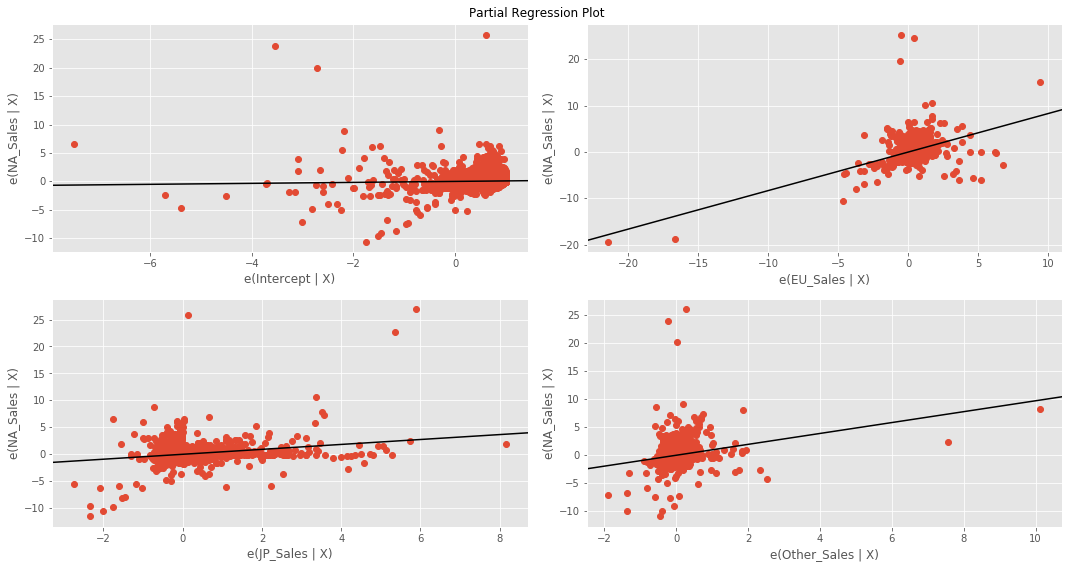

In [59]:
#plotting the results of our linear regression model by Name
fig_name = plt.figure(figsize = (15,8))
fig_name_plot = sm.graphics.plot_partregress_grid(sales_model_name_all, fig = fig_name)
fig_name_plot.savefig("Regression by Name - NA as a function of other countries' sales.png")

In [55]:
#Run linear regression on the "Genre" subset using North American sales as our Dependent variable and EU, Japan and Other Countries 
#as our independent variables. The new "OtherCountries" variable is not in this analysis
sales_model_genre = ols("NA_Sales ~ EU_Sales + JP_Sales + Other_Sales", data = sales_by_genre).fit()
#sales_model_2 = ols("NA_Sales ~ EU_Sales + ", data = sales_by_name).fit()
sales_model_genre.summary()


C:\Users\markl\Anaconda3\envs\PythonDev\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     112.2
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           7.07e-07
Time:                        13:05:57   Log-Likelihood:                -59.973
No. Observations:                  12   AIC:                             127.9
Df Residuals:                       8   BIC:                             129.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3894     30.787     -0.013      0.990     -71.384      70.605
EU_Sales        2.6579      0.877      3.029      0.016       0.635       4.681
JP_Sales        0.0180      0.161      0.112      0.914      -0.352       0.388
Other_Sales    -2.6460      2.374     -1.115      0.297      -8.120       2.828
==============================================================================
Omnibus:                        0.841   Durbin-Watson:                   2.975
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.673
Skew:                          -0.229   Prob(JB):                        0.714
Kurtosis:                       1.934   Cond. No.                         677.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

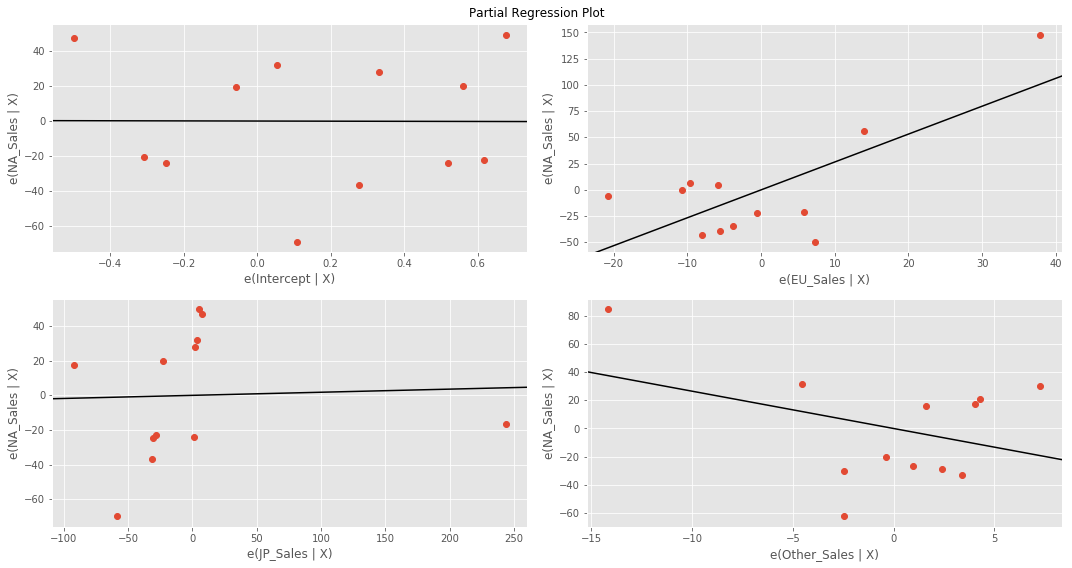

In [57]:
fig_g = plt.figure(figsize = (15,8))
fig_g = sm.graphics.plot_partregress_grid(sales_model_genre, fig = fig_g)
fig_g.savefig("Regression by Genre - NA as a function of other countries' sales.png")

In [60]:
#Run linear regression on the "Platform" subset using North American sales as our Dependent variable and EU, Japan and Other Countries 
#as our independent variables. The new "OtherCountries" variable is not in this analysis
sales_model_platform = ols("NA_Sales ~ EU_Sales + JP_Sales + Other_Sales", data = sales_by_platform).fit()
sales_model_platform.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     66.00
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           1.49e-12
Time:                        13:07:59   Log-Likelihood:                -170.81
No. Observations:                  31   AIC:                             349.6
Df Residuals:                      27   BIC:                             355.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5330     15.996      0.596      0.556     -23.289      42.355
EU_Sales        1.6647      0.301      5.522      0.000       1.046       2.283
JP_Sales        0.2962      0.270      1.095      0.283      -0.259       0.851
Other_Sales    -0.4495      0.698     -0.644      0.525      -1.881       0.982
==============================================================================
Omnibus:                        3.184   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                1.970
Skew:                          -0.241   Prob(JB):                        0.373
Kurtosis:                       4.137   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

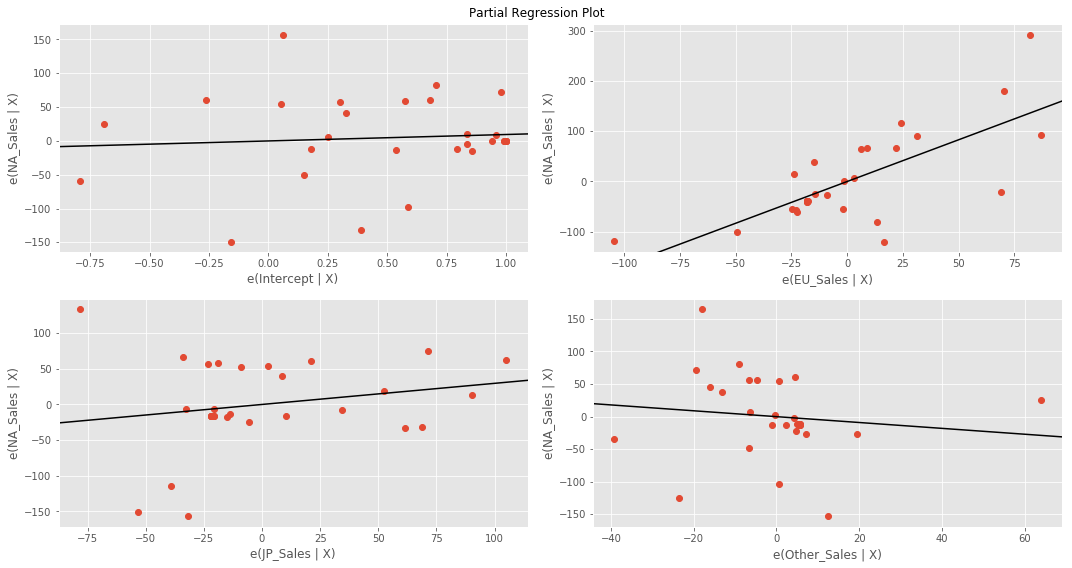

In [66]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_partregress_grid(sales_model_platform, fig = fig)
fig.savefig("Regression Platform - NA as a function of other countries' sales.png")

Text(0.5,1,'Platform - Predicting NA Sales - ResidualsPlot')

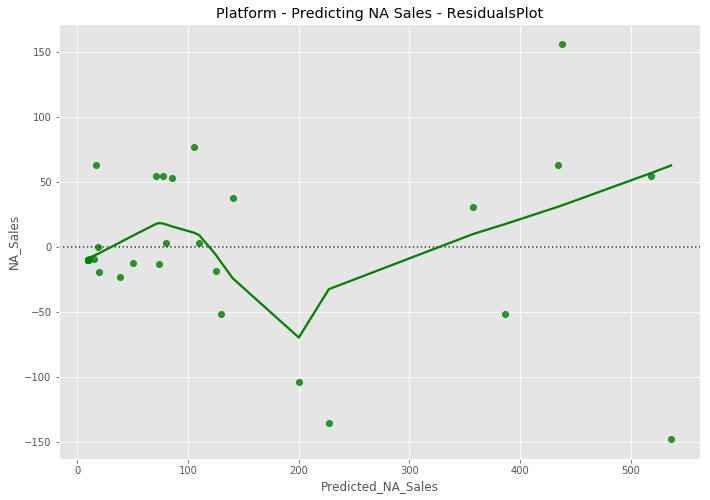

In [62]:
#Now let's use linear regression to make predictions on NA Sales within platform; we could have done this for every 
#subset of our data (Name, Publisher, Genre) but deciding to use Platform only

predicted_NA_Sales =  sales_model_platform.predict()

sales_by_platform['Predicted_NA_Sales'] = predicted_NA_Sales

sales_by_platform['Residual'] = sales_by_platform['Predicted_NA_Sales'] - sales_by_platform['NA_Sales']

fig_resid_plat, ax = plt.subplots()
fig_resid_plat.set_size_inches(11.5,8)

sns.residplot(sales_by_platform['Predicted_NA_Sales'],sales_by_platform['NA_Sales'], 
              lowess = True, color ="g").set_title('Platform - Predicting NA Sales - ResidualsPlot')


In [63]:
#Run linear regression on the "Publisher" subset using North American sales as our Dependent variable and EU, Japan and Other Countries 
#as our independent variables. The new "OtherCountries" variable is not in this analysis
sales_model_pub = ols("NA_Sales ~ EU_Sales + JP_Sales + Other_Sales", data = sales_by_pub).fit()
sales_model_pub.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.267e+04
Date:                Sun, 23 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:09:59   Log-Likelihood:                -1864.8
No. Observations:                 576   AIC:                             3738.
Df Residuals:                     572   BIC:                             3755.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2409      0.261      0.923      0.356      -0.272       0.753
EU_Sales        2.2899      0.061     37.536      0.000       2.170       2.410
JP_Sales        0.0186      0.023      0.817      0.415      -0.026       0.063
Other_Sales    -1.7062      0.169    -10.117      0.000      -2.037      -1.375
==============================================================================
Omnibus:                      477.207   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68971.208
Skew:                           2.849   Prob(JB):                         0.00
Kurtosis:                      56.304   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

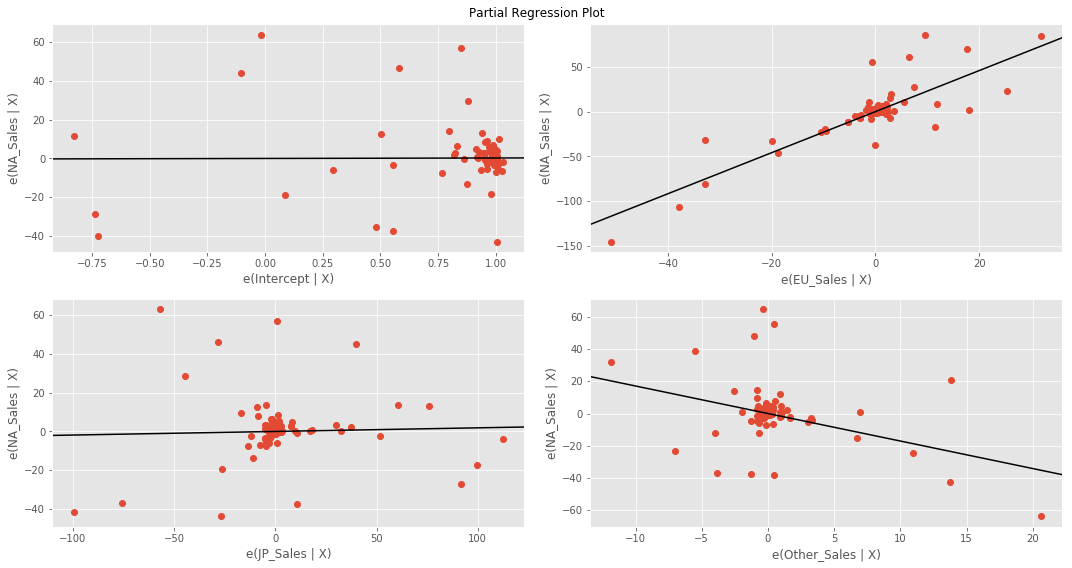

In [65]:
fig_pub = plt.figure(figsize = (15,8))
fig_pub = sm.graphics.plot_partregress_grid(sales_model_pub, fig = fig_pub)
fig.savefig("Regression by Publisher- NA as a function of other countries' sales.png")